# Représentation graphique des orbitales atomiques

##### Germain Salvato-Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

1. [Parties Radiales](#2.-Parties-radiales)
2. [Parties angulaires](#2.-Parties-angulaires)
3. [Orbitales atomiques](#3.-Orbitales-atomiques)

Un site avec de nombreuses visualisations : [orbitron gallery](http://winter.group.shef.ac.uk/orbitron/)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

## 1. Parties radiales

### Expressions des parties radiales

Experssion analytique des parties radiales des orbitales atomiques d'un ion hydrogènpïde de numéro atomique $Z$ :

\begin{align*}
    R_{10}(r) & = 2 \left(\frac{Z}{a_o}\right)^{3/2} \exp\left(-\frac{Zr}{a_o}\right) \\
    R_{20}(r) & = \frac{1}{2\sqrt{2}} \left(\frac{Z}{a_o}\right)^{3/2}  \left(2 - \frac{Zr}{a_o}\right) \exp\left(-\frac{Zr}{2a_o}\right) \\
    R_{21}(r) & = \frac{1}{2\sqrt{6}} \left(\frac{Z}{a_o}\right)^{5/2}  r \exp\left(-\frac{Zr}{2a_o}\right) \\
    R_{30}(r) & = \frac{2}{81\sqrt{3}} \left(\frac{Z}{a_o}\right)^{3/2} \left(27 - \frac{18Zr}{a_o} + \frac{2Z^2r^2}{{a_o}^2}\right) \exp\left(-\frac{Zr}{3a_o}\right) \\
    R_{31}(r) & = \frac{4}{81\sqrt{6}} \left(\frac{Z}{a_o}\right)^{5/2} \left(6r - \frac{Zr^2}{a_o}\right) \exp\left(-\frac{Zr}{3a_o}\right) \\
    R_{32}(r) & = \frac{4}{81\sqrt{30}} \left(\frac{Z}{a_o}\right)^{7/2}  r^2 \exp\left(-\frac{Zr}{3a_o}\right)
\end{align*}

In [2]:
def radial1s(r, Z=1, ao=0.529):
    rho = Z * r / ao
    return 2 * np.sqrt(Z/ao)**3 * np.exp(- rho)

In [3]:
def radial2s(r, Z=1, ao=0.529):
    rho = Z * r / ao
    return 1 / (2 * np.sqrt(2)) * (Z/ao)**(3/2) * (2 - rho) * np.exp(- rho / 2)

In [4]:
def radial2p(r, Z=1, ao=0.529):
    rho = Z * r / ao
    return 1 / (2 * np.sqrt(6)) * (Z/ao)**(3/2) * rho * np.exp(- rho / 2)

In [5]:
def radial3s(r, Z=1, ao=0.529):
    rho = Z * r / ao
    return 2 / (81 * np.sqrt(3)) * (Z/ao)**(3/2) * (27 - 18*rho + 2*rho**2) * np.exp(- rho / 3)

In [6]:
def radial3p(r, Z=1, ao=0.529):
    rho = Z * r / ao
    return 4 / (81 * np.sqrt(6)) * (Z/ao)**(3/2) * (6 * rho - rho**2) * np.exp(- rho / 3)

In [7]:
def radial3d(r, Z=1, ao=0.529):
    rho = Z * r / ao
    return 4 / (81 * np.sqrt(30)) * (Z/ao)**(3/2) * rho**2 * np.exp(- rho / 3)

Vérification de la condition de normalisation.

In [8]:
r = np.linspace(0, 20, 200)
np.trapz(r**2 * radial1s(r)**2, x=r)

0.9999141329571536

### Représentation graphique

Représentation graphiques de la fonction d'onde et de la densité de probabilité de présence radiale.

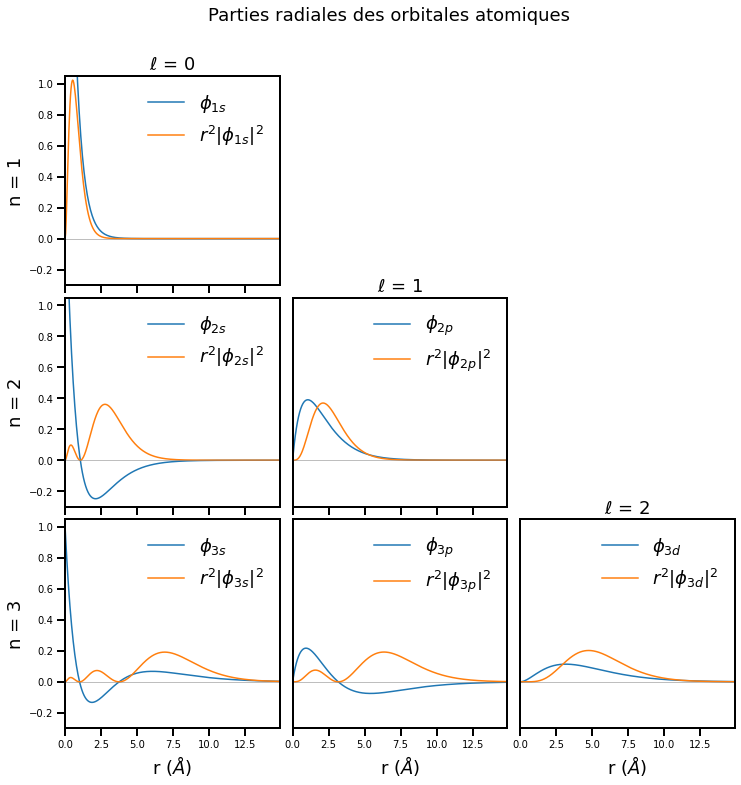

In [9]:
fig, axes = plt.subplots(
    ncols=3, nrows=3,
    figsize=(12, 12), sharex=True, sharey=True, 
    gridspec_kw=dict(wspace=.06, hspace=.06)
)
[ax.grid(False) for ax in axes.flatten()]

#plt.rcParams["font.size"] = 12
size = 18

r = np.linspace(0, 15, 400)

axes[0, 0].plot(r, radial1s(r), label=r"$\phi_{1s}$")
axes[0, 0].plot(r, r**2 * radial1s(r)**2, label=r"$r^2 \left\vert\phi_{1s}\right\vert^2$")

axes[1, 0].plot(r, radial2s(r), label=r"$\phi_{2s}$")
axes[1, 0].plot(r, r**2 * radial2s(r)**2, label=r"$r^2 \left\vert\phi_{2s}\right\vert^2$")

axes[1, 1].plot(r, radial2p(r), label=r"$\phi_{2p}$")
axes[1, 1].plot(r, r**2 * radial2p(r)**2, label=r"$r^2 \left\vert\phi_{2p}\right\vert^2$")

axes[2, 0].plot(r, radial3s(r), label=r"$\phi_{3s}$")
axes[2, 0].plot(r, r**2 * radial3s(r)**2, label=r"$r^2 \left\vert\phi_{3s}\right\vert^2$")

axes[2, 1].plot(r, radial3p(r), label=r"$\phi_{3p}$")
axes[2, 1].plot(r, r**2 * radial3p(r)**2, label=r"$r^2 \left\vert\phi_{3p}\right\vert^2$")

axes[2, 2].plot(r, radial3d(r), label=r"$\phi_{3d}$")
axes[2, 2].plot(r, r**2 * radial3d(r)**2, label=r"$r^2 \left\vert\phi_{3d}\right\vert^2$")

for i in range(3):
    axes[i, 0].set_ylabel("n = %d" % (i + 1), fontsize=size)
    for j in range(3):
        if j > i:
            axes[i, j].axis("off")
            
        else:
            axes[i, j].plot([0, 15], [0, 0], linewidth=.5, color="C7", label="")
            axes[i, j].legend(fontsize=size, frameon=False)
            if i == 2:
                axes[i, j].set_xlabel("r ($\AA$)", fontsize=size)
            if i == j:
                axes[i, j].set_title("$\ell$ = %d" % j, fontsize=size)
            if j > 0:
                axes[i, j].yaxis.set_visible(False)


axes[0, 0].set_ylim((-.3, 1.05))
axes[0, 0].set_xlim((0, 14.9))
fig.suptitle("Parties radiales des orbitales atomiques", fontsize=size, y=.96)

fig.savefig("AO_radial.pdf", bbox_inches="tight")

## 2. Parties angulaires

### Expressions des parties angulaires

Harmoniques spéhriques $Y^m_{\ell}(\theta, \varphi)$

\begin{align*}
    Y_0^0 & = \frac{1}{\sqrt{4\pi}} \\
    Y_1^0 & = \sqrt{\frac{3}{4\pi}} \cos\theta & 
    Y_1^{\pm1} & = \mp\sqrt{\frac{3}{2\pi}} \sin\theta \, e^{\pm i\varphi} \\
    Y_2^0 & = \sqrt{\frac{5}{16\pi}} \left(3\cos^2\theta-1\right) &
    Y_2^{\pm 1} & = \mp \sqrt{\frac{15}{4\pi}} \sin\theta\cos\theta \, e^{\pm i\varphi} &
    Y_2^{\pm 2} & = \sqrt{\frac{15}{4\pi}} \sin^2\theta \, e^{\pm 2i\varphi} \\
    Y_3^0 & = \sqrt{\frac{7}{16\pi}} \left(5\cos^3\theta - 3\cos\theta\right) &
    Y_3^{\pm 1} & = \mp \sqrt{\frac{21}{64\pi}} \sin\theta\left(5\cos^2\theta - 1\right) \, e^{\pm i\varphi} &
    Y_3^{\pm 2} & = \sqrt{\frac{105}{16\pi}} \sin^2\theta\cos\theta \, e^{\pm 2i\varphi} \\
    & & & & Y_3^{\pm 3} & = \mp \sqrt{\frac{35}{64\pi}} \sin^3\theta \, e^{\pm 3i\varphi}
\end{align*}

Les fonctions pour m=0 sont réelles :

In [10]:
def Y00(theta, phi):
    return 1 / np.sqrt(4 * np.pi)

In [11]:
def Y10(theta, phi):
    return np.sqrt(3 / (4 * np.pi)) * np.cos(theta)

In [12]:
def Y20(theta, phi):
    return np.sqrt(5 / (16 * np.pi)) * (3 * np.cos(theta)**2 - 1)

In [13]:
def Y30(theta, phi):
    return np.sqrt(7 / (16 * np.pi)) * (5 * np.cos(theta)**3 - 3 * np.cos(theta))

On peut construire des fonctions réelles en combinant des fonctions de même valeur de m. Par exemple :

\begin{equation*}
    \frac{1}{\sqrt 2} \left(-Y_1^1 + Y_1^{-1}\right) = \sqrt{\frac{3}{2\pi}} \sin\theta\cos\varphi
\end{equation*}

In [14]:
def Y11x(theta, phi):
    """ 1 / sqrt(2) (-Y_1^1 + Y_1^-1) """
    return np.sqrt(3 / (4 * np.pi)) * np.sin(theta) * np.cos(phi)

In [15]:
def Y21xz(theta, phi):
    """ 1 / sqrt(2) (-Y_2^1 + Y_2^-1) """
    return np.sqrt(15 / (2 * np.pi)) * np.sin(theta) * np.cos(theta) * np.cos(phi)

In [16]:
def Y31xz2(theta, phi):
    """ 1 / sqrt(2) (-Y_3^1 + Y_3^-1) """
    return np.sqrt(21 / (32 * np.pi)) * np.sin(theta) * (5 * np.cos(theta)**2 - 1) * np.cos(phi)

### Représentation graphique

On représentera deux fonctions réelles pour chaque valeurs de $\ell$.

In [17]:
def pos_neg_part(fonction, theta, phi=0):
    """ return the positive and negative part of the fonction """
    r = fonction(theta, phi)
    ix = np.where(r >= 0)
    xp = r[ix] * np.sin(theta[ix])
    zp = r[ix] * np.cos(theta[ix])
    ix = np.where(r < 0)
    xn = -r[ix] * np.sin(theta[ix])
    zn = -r[ix] * np.cos(theta[ix])
    return xp, zp, xn, zn

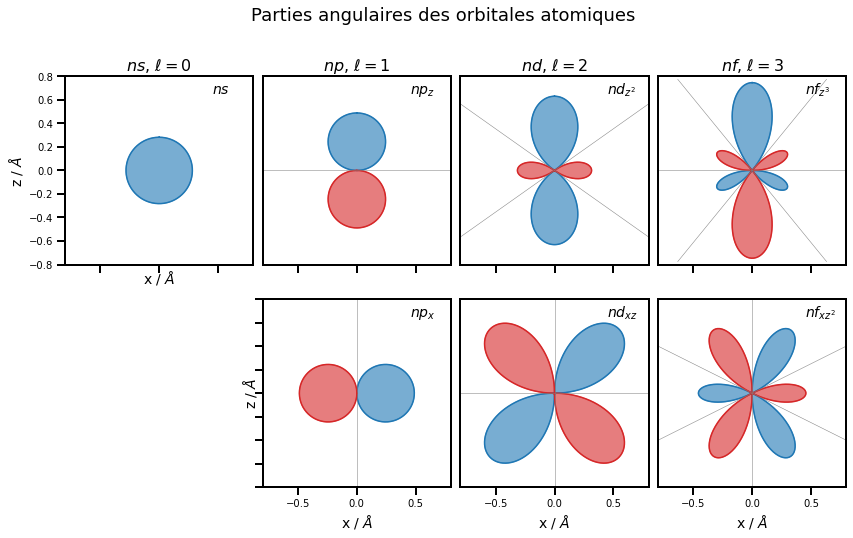

In [22]:
fig, axes = plt.subplots(
    ncols=4, nrows=2,
    figsize=(14, 8), sharex=True, sharey=True, 
    gridspec_kw=dict(wspace=.05, hspace=.05)
)

for ax in axes.flatten():
    ax.grid(False)
    ax.set_aspect("equal")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

npts = 500
lim = .8
a = .6
cp = "C0" # positive
cn = "C3" # negative
co = "C7" # nodal
theta = np.linspace(0, 2 * np.pi, npts)

# s
x = Y00(theta, phi=0) * np.sin(theta)
z = Y00(theta, phi=0) * np.cos(theta)
axes[0, 0].fill(x, z, color=cp, alpha=a)
axes[0, 0].plot(x, z, color=cp)
axes[0, 0].set_title("$ns$, $\ell=0$", fontsize=16)
axes[0, 0].set_xlabel("x / $\AA$", fontsize=14)
axes[0, 0].text(.45, .65, "$ns$", fontsize=14)
axes[1, 0].axis("off")

# p
xp, zp, xn, zn = pos_neg_part(Y10, theta)
axes[0, 1].fill(xp, zp, alpha=a, color=cp)
axes[0, 1].plot(xp, zp, color=cp)
axes[0, 1].fill(xn, zn, color=cn, alpha=a)
axes[0, 1].plot(xn, zn, color=cn)
axes[0, 1].plot((-lim, lim), (0, 0), color=co, lw=.5)
axes[0, 1].set_title("$np$, $\ell=1$", fontsize=16)
axes[0, 1].text(.45, .65, "$np_z$", fontsize=14)
axes[0, 1].yaxis.set_visible(False)

xp, zp, xn, zn = pos_neg_part(Y11x, theta)
axes[1, 1].fill(xp, zp, color=cp, alpha=a)
axes[1, 1].plot(xp, zp, color=cp)
axes[1, 1].fill(xn, zn, color=cn, alpha=a)
axes[1, 1].plot(xn, zn, color=cn)
axes[1, 1].plot((0, 0), (-lim, lim), color=co, lw=.5)
axes[1, 1].set_xlabel("x / $\AA$", fontsize=14)
axes[1, 1].set_ylabel("z / $\AA$", fontsize=14)
axes[1, 1].text(.45, .65, "$np_x$", fontsize=14)

# d
xp, zp, xn, zn = pos_neg_part(Y20, theta)
axes[0, 2].fill(xp, zp, color=cp, alpha=a)
axes[0, 2].plot(xp, zp, color=cp)
axes[0, 2].fill(xn, zn, color=cn, alpha=a)
axes[0, 2].plot(xn, zn, color=cn)
theta0 = np.arccos(1 / np.sqrt(3))
axes[0, 2].plot((-np.sin(theta0), np.sin(theta0)), (-np.cos(theta0), np.cos(theta0)), color=co, lw=.5)
axes[0, 2].plot((-np.sin(theta0), np.sin(theta0)), (np.cos(theta0), -np.cos(theta0)), color=co, lw=.5)
axes[0, 2].set_title("$nd$, $\ell=2$", fontsize=16)
axes[0, 2].text(.45, .65, "$nd_{z^2}$", fontsize=14)
axes[0, 2].yaxis.set_visible(False)

xp, zp, xn, zn = pos_neg_part(Y21xz, theta)
axes[1, 2].fill(xp, zp, color=cp, alpha=a)
axes[1, 2].plot(xp, zp, color=cp)
axes[1, 2].fill(xn, zn, color=cn, alpha=a)
axes[1, 2].plot(xn, zn, color=cn)
axes[1, 2].plot((0, 0), (-lim, lim), color=co, lw=.5)
axes[1, 2].plot((-lim, lim), (0, 0), color=co, lw=.5)
axes[1, 2].set_xlabel("x / $\AA$", fontsize=14)
axes[1, 2].text(.45, .65, "$nd_{xz}$", fontsize=14)
axes[1, 2].yaxis.set_visible(False)

# f
xp, zp, xn, zn = pos_neg_part(Y30, theta)
axes[0, 3].fill(xp, zp, color=cp, alpha=a)
axes[0, 3].plot(xp, zp, color=cp)
axes[0, 3].fill(xn, zn, color=cn, alpha=a)
axes[0, 3].plot(xn, zn, color=cn)
axes[0, 3].plot((-lim, lim), (0, 0), color=co, lw=.5)
theta0 = np.arccos(np.sqrt(3/5))
axes[0, 3].plot((-np.sin(theta0), np.sin(theta0)), (-np.cos(theta0), np.cos(theta0)), color=co, lw=.5)
axes[0, 3].plot((-np.sin(theta0), np.sin(theta0)), (np.cos(theta0), -np.cos(theta0)), color=co, lw=.5)
axes[0, 3].set_title("$nf$, $\ell=3$", fontsize=16)
axes[0, 3].text(.45, .65, "$nf_{z^3}$", fontsize=14)
axes[0, 3].yaxis.set_visible(False)

xp, zp, xn, zn = pos_neg_part(Y31xz2, theta)
axes[1, 3].fill(xp, zp, color=cp, alpha=a)
axes[1, 3].plot(xp, zp, color=cp)
axes[1, 3].fill(xn, zn, color=cn, alpha=a)
axes[1, 3].plot(xn, zn, color=cn)
axes[1, 3].plot((0, 0), (-lim, lim), color=co, lw=.5)
theta0 = np.arccos(np.sqrt(1/5))
axes[1, 3].plot((-np.sin(theta0), np.sin(theta0)), (-np.cos(theta0), np.cos(theta0)), color=co, lw=.5)
axes[1, 3].plot((-np.sin(theta0), np.sin(theta0)), (np.cos(theta0), -np.cos(theta0)), color=co, lw=.5)
axes[1, 3].set_xlabel("x / $\AA$", fontsize=14)
axes[1, 3].text(.45, .65, "$nf_{xz^2}$", fontsize=14)
axes[1, 3].yaxis.set_visible(False)

# layout
axes[0, 0].set_ylabel("z / $\AA$", fontsize=14)
fig.suptitle("Parties angulaires des orbitales atomiques", fontsize=18)
fig.savefig("OA_angular.pdf", bbox_inches="tight")

## 3. Orbitales atomiques

L'expression générale des orbitales atomiques fait intervenir une partie radiale et une partie angulaire et est caractérisée par les trois nombres quantiques $(n, \ell, m_{\ell})$ :
\begin{equation*}
\Psi_{n, \ell, m_{\ell}}(r, \theta, \varphi) = R_{n, \ell} (r) \, Y_{\ell}^{m_{\ell}}(\theta, \varphi)
\end{equation*}

On représente la densité électronique associée à différentes orbitales atomiques dans le plan $(xOz)$.

In [23]:
def sample(fonction, rmax=10, ntry=10000, phi=0):
    """ échantillonage de la densité de probabilité de présence associée à une OA """
    x = np.random.uniform(-rmax, rmax, ntry)
    z = np.random.uniform(-rmax, rmax, ntry)
    r = np.sqrt(x**2 + z**2)
    theta = np.arccos(z / r) # le theta des sphériques

    rho = fonction(r, theta, phi=phi)**2
    rnd = np.random.rand(ntry)
    ix = np.where(rho > rnd)
    return x[ix], z[ix]

### Orbitales atomiques de symétrie sphérique

In [26]:
def OA1s(r, theta, phi, ao=0.529, Z=1):
    return radial1s(r, Z, ao) * Y00(theta, phi)

In [27]:
def OA2s(r, theta, phi, ao=0.529, Z=1):
    return radial2s(r, Z, ao) * Y00(theta, phi)

In [28]:
def OA3s(r, theta, phi, ao=0.529, Z=1):
    return radial3s(r, Z, ao) * Y00(theta, phi)

1s (2220,)
2s (2450,)
3s (2716,)


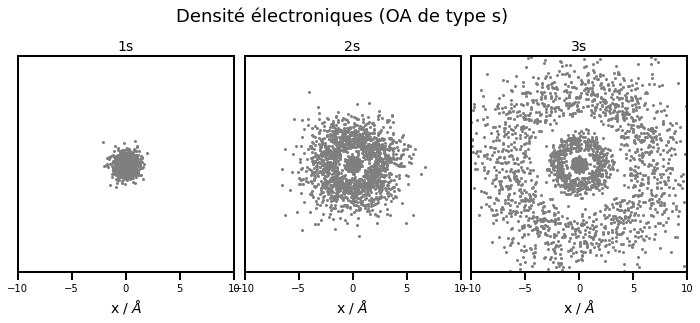

In [41]:
fig, axes = plt.subplots(
    ncols=3, nrows=1,
    figsize=(12, 4), sharex=True, sharey=True, 
    gridspec_kw=dict(wspace=.05, hspace=.05)
)

# select ntry such as you get about the same amout of points for each case

# 1s
x, z = sample(OA1s, ntry=1000000, rmax=10)
axes[0].scatter(x, z, s=4, color="C7")
axes[0].set(aspect="equal")

print("1s", x.shape)

# 2s
x, z = sample(OA2s, ntry=6000000, rmax=12)
axes[1].scatter(x, z, s=4, color="C7")
axes[1].set(aspect="equal")
axes[1].grid(False)
axes[1].yaxis.set_visible(False)
print("2s", x.shape)

# 3s
x, z = sample(OA3s, ntry=20000000, rmax=14)
axes[2].scatter(x, z, s=4, color="C7")
axes[2].set(aspect="equal")
print("3s", x.shape)
rmax = 10
axes[2].set_xlim((-rmax, rmax))
axes[2].set_ylim((-rmax, rmax))
axes[2].grid(False)
axes[2].yaxis.set_visible(False)

axes[0].set_ylabel("z / $\AA$", fontsize=14)
axes[0].grid(False)
axes[0].yaxis.set_visible(False)
for i in range(3):
    axes[i].set_xlabel("x / $\AA$", fontsize=14)
    axes[i].set_title("%ds" % (i+1), fontsize=14)
fig.suptitle("Densité électroniques (OA de type s)", fontsize=18, y=1.05)
fig.savefig("nuage_electronique_s.pdf", bbox_inches="tight")

1s (2265,)
2s (2609,)
3s (2667,)


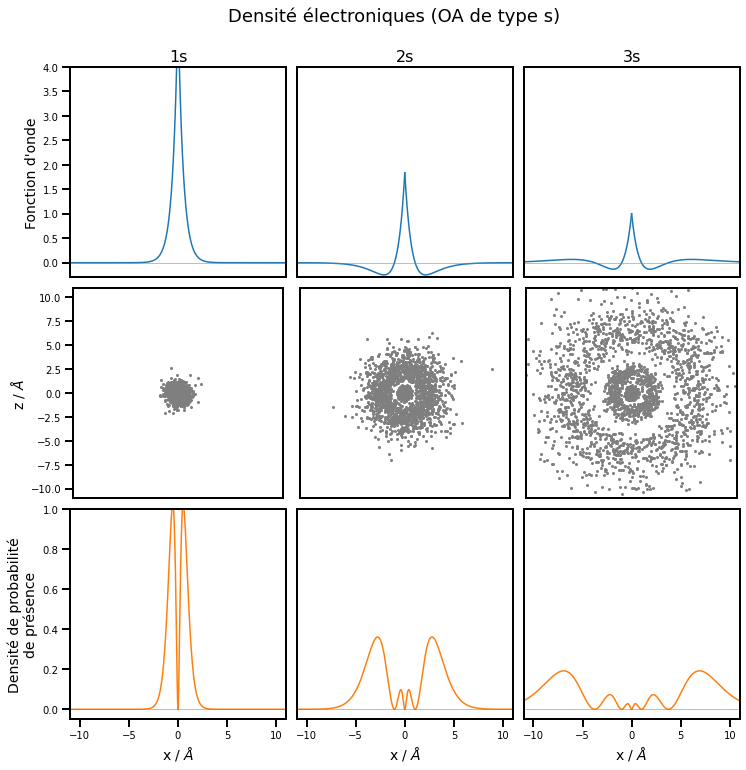

In [40]:
# select ntry such as you get about the same amout of points for each case

rmax = 11

fig = plt.figure(figsize=(12, 12))
r = np.linspace(0, 15, 400)
for i, OA in enumerate([(radial1s, "1s"), (radial2s, "2s"), (radial3s, "3s")]):
    fonction, label = OA
    ax = fig.add_subplot(3, 3, i + 1)
    ax.plot(r, fonction(r), color="C0")
    ax.plot(-r, fonction(r), color="C0")
    ax.plot((-rmax, rmax), (0, 0), color="C7", linewidth=.5)
    ax.set_ylim((-.3, 4))
    ax.set_xlim((-rmax, rmax))
    ax.xaxis.set_visible(False)
    ax.set_title(label, fontsize=16)
    ax.grid(False)
    if i == 0:
        ax.set_ylabel("Fonction d'onde", fontsize=14)
    if i > 0:
        ax.yaxis.set_visible(False)

    ax = fig.add_subplot(3, 3, 7 + i)
    ax.plot(r, r**2 * fonction(r)**2, color="C1")
    ax.plot(-r, r**2 * fonction(r)**2, color="C1")
    ax.set_xlim((-rmax, rmax))
    ax.set_ylim((-.05, 1))
    ax.plot((-rmax, rmax), (0, 0), color="C7", linewidth=.5)
    ax.set_xlabel("x / $\AA$", fontsize=14)
    ax.grid(False)
    if i == 0:
        ax.set_ylabel("Densité de probabilité\nde présence", fontsize=14)
    if i > 0:
        ax.yaxis.set_visible(False)

# 1s
x, z = sample(OA1s, ntry=1000000, rmax=10)
ax = fig.add_subplot(3, 3, 4)
ax.scatter(x, z, s=4, alpha=1, color="C7")
ax.set_xlim((-rmax, rmax))
ax.set(aspect="equal")
ax.xaxis.set_visible(False)
ax.set_ylabel("z / $\AA$", fontsize=14)
ax.grid(False)
print("1s", x.shape)

# 2s
x, z = sample(OA2s, ntry=6000000, rmax=12)
ax = fig.add_subplot(3, 3, 5, sharey=ax)
ax.scatter(x, z, s=4, alpha=1, color="C7")
ax.set_xlim((-rmax, rmax))
ax.set(aspect="equal")
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
print("2s", x.shape)

# 3s
x, z = sample(OA3s, ntry=20000000, rmax=14)
ax = fig.add_subplot(3, 3, 6, sharey=ax)
ax.scatter(x, z, s=4, alpha=1, color="C7")
ax.set_xlim((-rmax, rmax))
ax.set(aspect="equal")
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
print("3s", x.shape)

ax.set_xlim((-rmax, rmax))
ax.set_ylim((-rmax, rmax))

fig.suptitle("Densité électroniques (OA de type s)", fontsize=18, y=.95)
fig.savefig("AO_s.pdf", bbox_inches="tight")
fig.subplots_adjust(wspace=.05, hspace=.05)


### Orbitales atomiques p, d et f

In [33]:
def OA2pz(r, theta, phi, ao=0.529, Z=1):
    return radial2p(r, Z, ao) * Y10(theta, phi)

In [34]:
def OA3pz(r, theta, phi, ao=0.529, Z=1):
    return radial3p(r, Z, ao) * Y10(theta, phi)

In [35]:
def OA3dz2(r, theta, phi, ao=0.529, Z=1):
    return radial3d(r, Z, ao) * Y20(theta, phi)

In [36]:
def OA4fz3(r, theta, phi, ao=0.529, Z=1):
    rho = Z * r / ao
    radial  = 1 / (768 * np.sqrt(35)) * (Z/ao)**(3/2) * rho**3 * np.exp(- rho / 4)
    return radial * Y30(theta, phi)

1s (1829,)
2s (1674,)
2p (1962,)
3p (2647,)
3d (3074,)
4f (4733,)


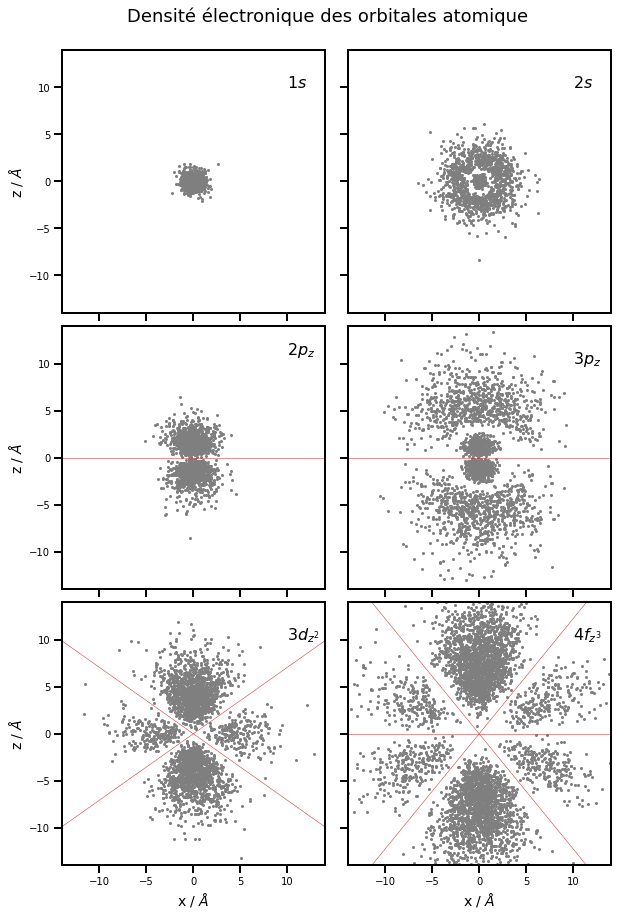

In [39]:
fig, axes = plt.subplots(
    ncols=2, nrows=3,
    figsize=(10, 15), sharex=True, sharey=True, 
    gridspec_kw=dict(wspace=.05, hspace=.05)
)
[ax.grid(False) for ax in axes.flatten()]

lim = 20
co = "C3"

# 1s
x, z = sample(OA1s, ntry=1200000, rmax=12)
axes[0, 0].scatter(x, z, s=4, color="C7")
axes[0, 0].set(aspect="equal")
axes[0, 0].text(10, 10, "$1s$", fontsize=16)
print("1s", x.shape)

# 2s
x, z = sample(OA2s, ntry=4000000, rmax=12)
axes[0, 1].scatter(x, z, s=4, color="C7")
axes[0, 1].set(aspect="equal")
axes[0, 1].text(10, 10, "$2s$", fontsize=16)
print("2s", x.shape)

# 2p
x, z = sample(OA2pz, ntry=5000000, rmax=15)
axes[1, 0].scatter(x, z, s=4, color="C7")
axes[1, 0].set_aspect("equal")
axes[1, 0].plot((-lim, lim), (0, 0), color=co, lw=.5)
axes[1, 0].text(10, 11, "$2p_z$", fontsize=16)
print("2p", x.shape)

# 3p
x, z = sample(OA3pz, ntry=15000000, rmax=15)
axes[1, 1].scatter(x, z, s=4, color="C7")
axes[1, 1].set_aspect("equal")
axes[1, 1].plot((-lim, lim), (0, 0), color=co, lw=.5)
axes[1, 1].text(10, 10, "$3p_z$", fontsize=16)
print("3p", x.shape)

# 3dz2
x, z = sample(OA3dz2, ntry=15000000, rmax=15)
axes[2, 0].scatter(x, z, s=4, color="C7")
axes[2, 0].set_aspect("equal")
theta0 = np.arccos(np.sqrt(1/3))
axes[2, 0].plot(
    (-lim * np.sin(theta0), lim * np.sin(theta0)), 
    (-lim * np.cos(theta0), lim * np.cos(theta0)), 
    color=co, lw=.5
)
axes[2, 0].plot(
    (-lim * np.sin(theta0), lim * np.sin(theta0)), 
    (lim * np.cos(theta0), -lim * np.cos(theta0)), 
    color=co, lw=.5
)
axes[2, 0].text(10, 10, "$3d_{z^2}$", fontsize=16)
print("3d", x.shape)

# 4fz3
x, z = sample(OA4fz3, ntry=40000000, rmax=15)
axes[2, 1].scatter(x, z, s=4, color="C7")
axes[2, 1].set_aspect("equal")
theta0 = np.arccos(np.sqrt(3/5))
axes[2, 1].plot(
    (-lim * np.sin(theta0), lim * np.sin(theta0)), 
    (-lim * np.cos(theta0), lim * np.cos(theta0)), 
    color=co, lw=.5
)
axes[2, 1].plot(
    (-lim * np.sin(theta0), lim * np.sin(theta0)), 
    (lim * np.cos(theta0), -lim * np.cos(theta0)), 
    color=co, lw=.5
)
axes[2, 1].plot((-lim, lim), (0, 0), color=co, lw=.5)
axes[2, 1].text(10, 10, "$4f_{z^3}$", fontsize=16)
print("4f", x.shape)

# layout
axes[1, 1].set_xlim((-14, 14))
axes[1, 1].set_ylim((-14, 14))
axes[0, 0].set_ylabel("z / $\AA$", fontsize=14)
axes[1, 0].set_ylabel("z / $\AA$", fontsize=14)
axes[2, 0].set_ylabel("z / $\AA$", fontsize=14)
axes[2, 0].set_xlabel("x / $\AA$", fontsize=14)
axes[2, 1].set_xlabel("x / $\AA$", fontsize=14)

fig.suptitle("Densité électronique des orbitales atomique", fontsize=18, y=.92)
fig.savefig("AO_densite_electronique.pdf", bbox_inches="tight")